In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from glob import glob
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## 数据加载

In [56]:
data_path_folder = "data-20230913"
data = []
labels = []
for filename in glob(data_path_folder + "/*"):
    if not filename.endswith(".csv"):
        continue
    with open(os.path.join(filename), 'r') as f:
        lines = f.readlines()
        sample_data = [float(line) for line in lines]
        data.append(sample_data)
        label_str = filename.split('/')[1].split('-')[0]
        label = 1 if label_str == "pca" else 0
        labels.append(label)

In [57]:
# 分割数据集为训练集和测试集
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.23, random_state=42)

## 采用随机森林训练预测

In [73]:
# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=8)

# 训练随机森林分类器
rf.fit(train_data, train_labels)

# 在测试集上进行预测
predictions = rf.predict(test_data)

# 计算分类器的准确率
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.5


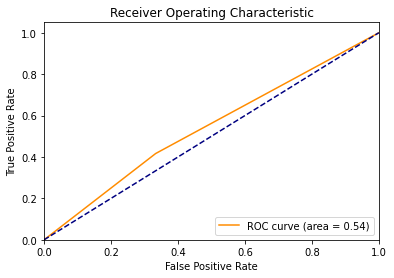

In [74]:
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 采用PCA降维到30维

In [62]:
pca = PCA(n_components=30)
pca.fit(data, labels)

# 将数据转换为新的特征空间
transformed_data = pca.transform(data)

In [63]:
# 分割数据集为训练集和测试集
train_data, test_data, train_labels, test_labels = \
    train_test_split(transformed_data, labels, test_size=0.23, random_state=42)

## 降维数据训练预测

In [68]:
# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练随机森林分类器
rf.fit(train_data, train_labels)

# 在测试集上进行预测
predictions = rf.predict(test_data)

# 计算分类器的准确率
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.5555555555555556


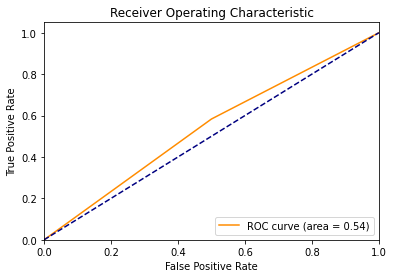

In [72]:
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()